In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import normaltest, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
clear_df = pd.read_csv('../readyDatasets/preprocessed_dataframe.csv')

<AxesSubplot:>

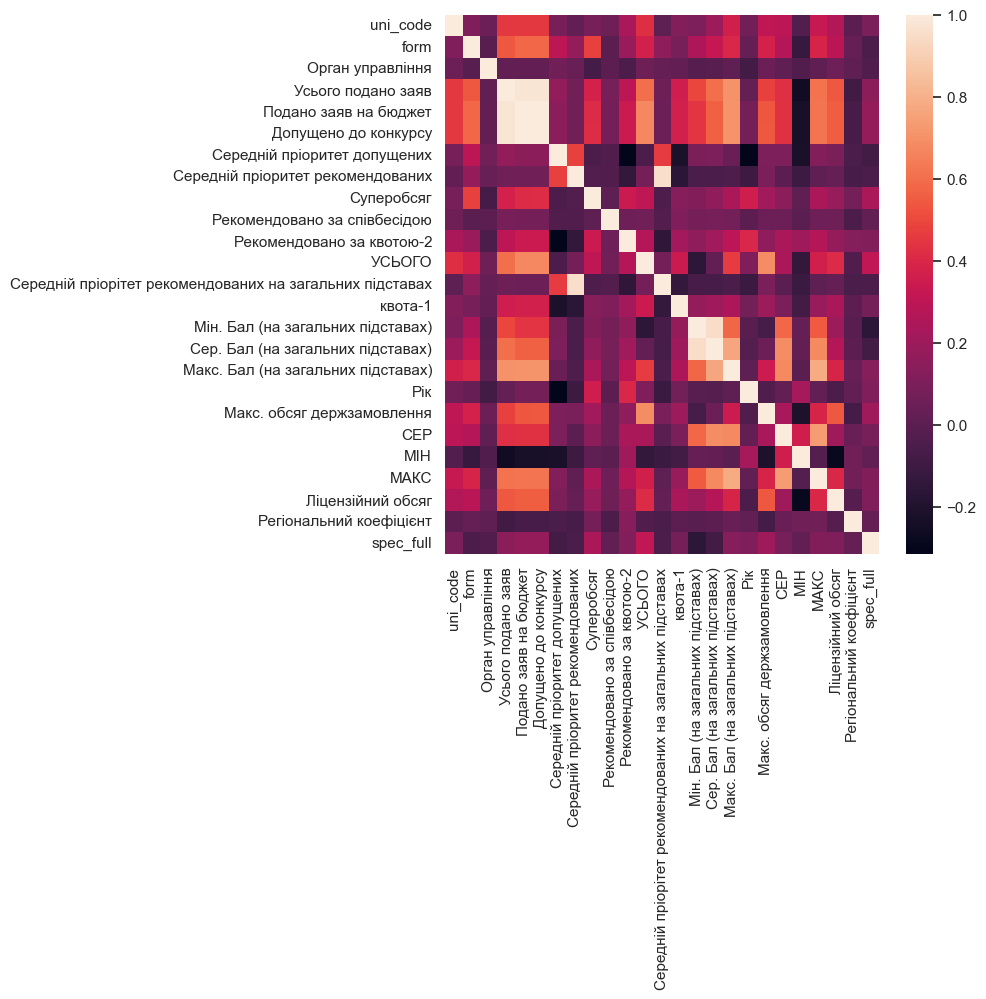

In [5]:
sns.set(rc={'figure.figsize': (7, 7)});
sns.heatmap(clear_df.corr(method='spearman'), xticklabels=True, yticklabels=True)

<AxesSubplot:xlabel='УСЬОГО', ylabel='Count'>

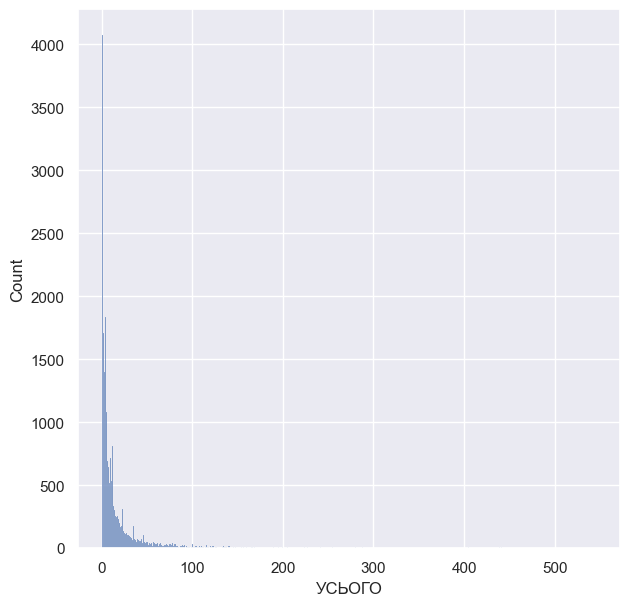

In [6]:
sns.histplot(clear_df['УСЬОГО'])

In [7]:
for var in clear_df.columns:

    p = normaltest(clear_df[var]).pvalue

    # нульова гіпотеза: x походить від нормального розподілу
    alpha = 0.05
    if p > alpha:
        print('розподіл схожий на нормальний для', var)
    else:
        print('розподіл НЕ схожий на нормальний для', var)

    # якщо розкоментувати це, то можна побачити, що p-value завжди 0
    # print('P-value для', var, '= %.5f' % p)

    # також це підверджує тест Шапіро
    print('Тест Шапіро для', var, shapiro(clear_df[var]).pvalue)

розподіл НЕ схожий на нормальний для uni_code
Тест Шапіро для uni_code 0.0
розподіл НЕ схожий на нормальний для form
Тест Шапіро для form 0.0
розподіл НЕ схожий на нормальний для Орган управління
Тест Шапіро для Орган управління 0.0
розподіл НЕ схожий на нормальний для Усього подано заяв
Тест Шапіро для Усього подано заяв 0.0
розподіл НЕ схожий на нормальний для Подано заяв на бюджет
Тест Шапіро для Подано заяв на бюджет 0.0
розподіл НЕ схожий на нормальний для Допущено до конкурсу
Тест Шапіро для Допущено до конкурсу 0.0
розподіл НЕ схожий на нормальний для Середній пріоритет допущених
Тест Шапіро для Середній пріоритет допущених 4.118797339832934e-39
розподіл НЕ схожий на нормальний для Середній пріоритет рекомендованих
Тест Шапіро для Середній пріоритет рекомендованих 0.0
розподіл НЕ схожий на нормальний для Суперобсяг
Тест Шапіро для Суперобсяг 0.0
розподіл НЕ схожий на нормальний для Рекомендовано за співбесідою
Тест Шапіро для Рекомендовано за співбесідою 0.0
розподіл НЕ схожий н

C:\Users\natan.chachko\PycharmProjects\pythonProject\venv\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Розподіл змінних далекий від нормального розподілу. Тому для визначення тiсноти зв’язку скористуємося ранговими коефiцiєнтами Спiрмена i Кендалла

УСЬОГО                                                      1.000000
Макс. обсяг держзамовлення                                  0.542016
Допущено до конкурсу                                        0.506950
Подано заяв на бюджет                                       0.506701
Усього подано заяв                                          0.446472
Макс. Бал (на загальних підставах)                          0.329120
form                                                        0.311158
uni_code                                                    0.299814
Ліцензійний обсяг                                           0.297941
квота-1                                                     0.278490
МАКС                                                        0.257080
spec_full                                                   0.218819
Рекомендовано за квотою-2                                   0.215833
Суперобсяг                                                  0.211465
СЕР                               

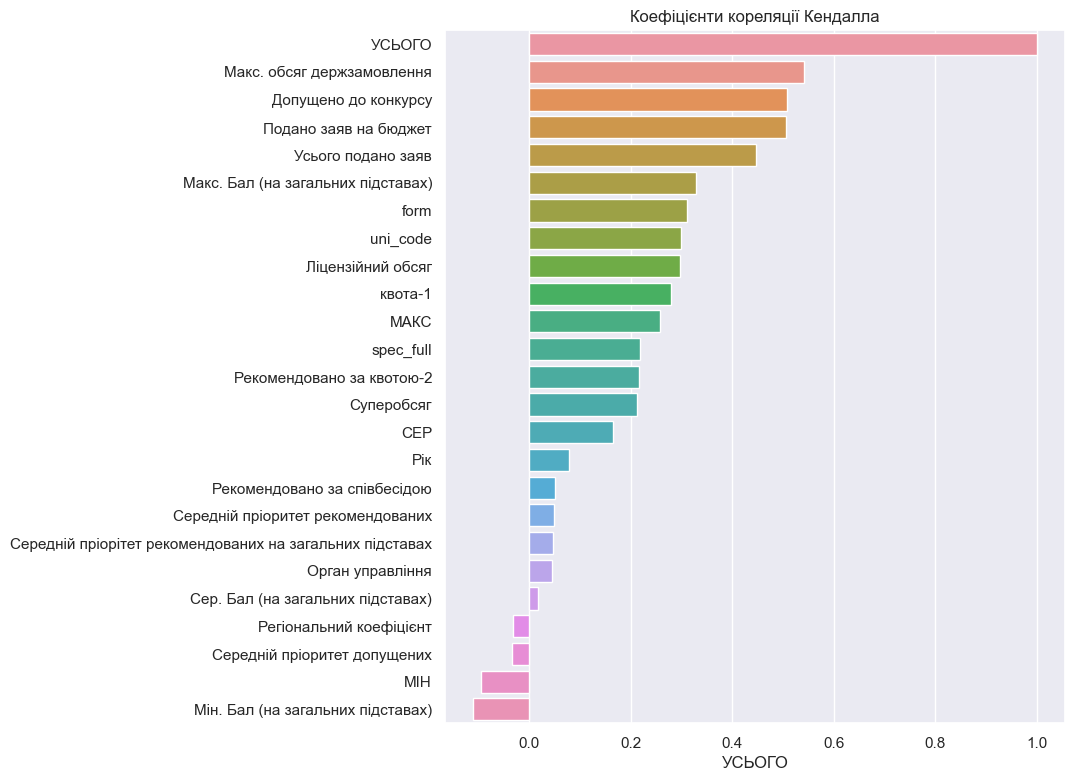

In [8]:
sns.set(rc={'figure.figsize': (8, 9)});

corr_kendall = clear_df.corr(method='kendall')['УСЬОГО'].sort_values(ascending=False)
sns.barplot(x=corr_kendall, y=corr_kendall.index).set(title='Коефіцієнти кореляції Кендалла')
print(corr_kendall)

УСЬОГО                                                      1.000000
Макс. обсяг держзамовлення                                  0.690271
Допущено до конкурсу                                        0.672055
Подано заяв на бюджет                                       0.671505
Усього подано заяв                                          0.602191
Макс. Бал (на загальних підставах)                          0.463079
uni_code                                                    0.424142
Ліцензійний обсяг                                           0.413872
form                                                        0.372138
МАКС                                                        0.365154
квота-1                                                     0.338165
spec_full                                                   0.309695
Суперобсяг                                                  0.303935
Рекомендовано за квотою-2                                   0.267334
СЕР                               

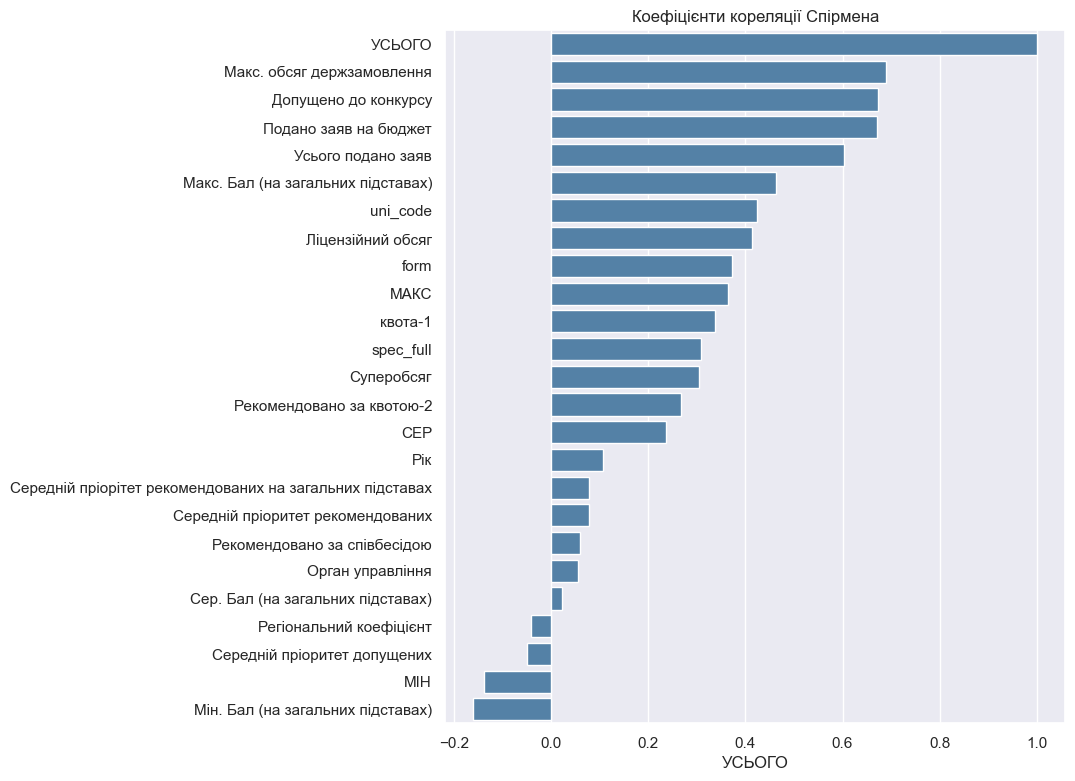

In [9]:
corr_spearman = clear_df.corr(method='spearman')['УСЬОГО'].sort_values(ascending=False)
sns.barplot(x=corr_spearman, y=corr_spearman.index, color='steelblue').set(title='Коефіцієнти кореляції Спірмена')
print(corr_spearman)

In [10]:
print(corr_spearman.sort_index() > corr_kendall.sort_index())

form                                                         True
spec_full                                                    True
uni_code                                                     True
Допущено до конкурсу                                         True
Ліцензійний обсяг                                            True
МІН                                                         False
МАКС                                                         True
Макс. Бал (на загальних підставах)                           True
Макс. обсяг держзамовлення                                   True
Мін. Бал (на загальних підставах)                           False
Орган управління                                             True
Подано заяв на бюджет                                        True
Регіональний коефіцієнт                                     False
Рекомендовано за квотою-2                                    True
Рекомендовано за співбесідою                                 True
Рік       

Коефіцієнт Спірмена більший за коефіцієнт Кендалла майже для усіх параметрів. Це вказує на лінійну залежність між цими параметрами та цільовою змінною.

Розглянемо детальніше відношення кожної змінної до таргету.

In [11]:
corr_spearman = corr_spearman.drop(['УСЬОГО'])

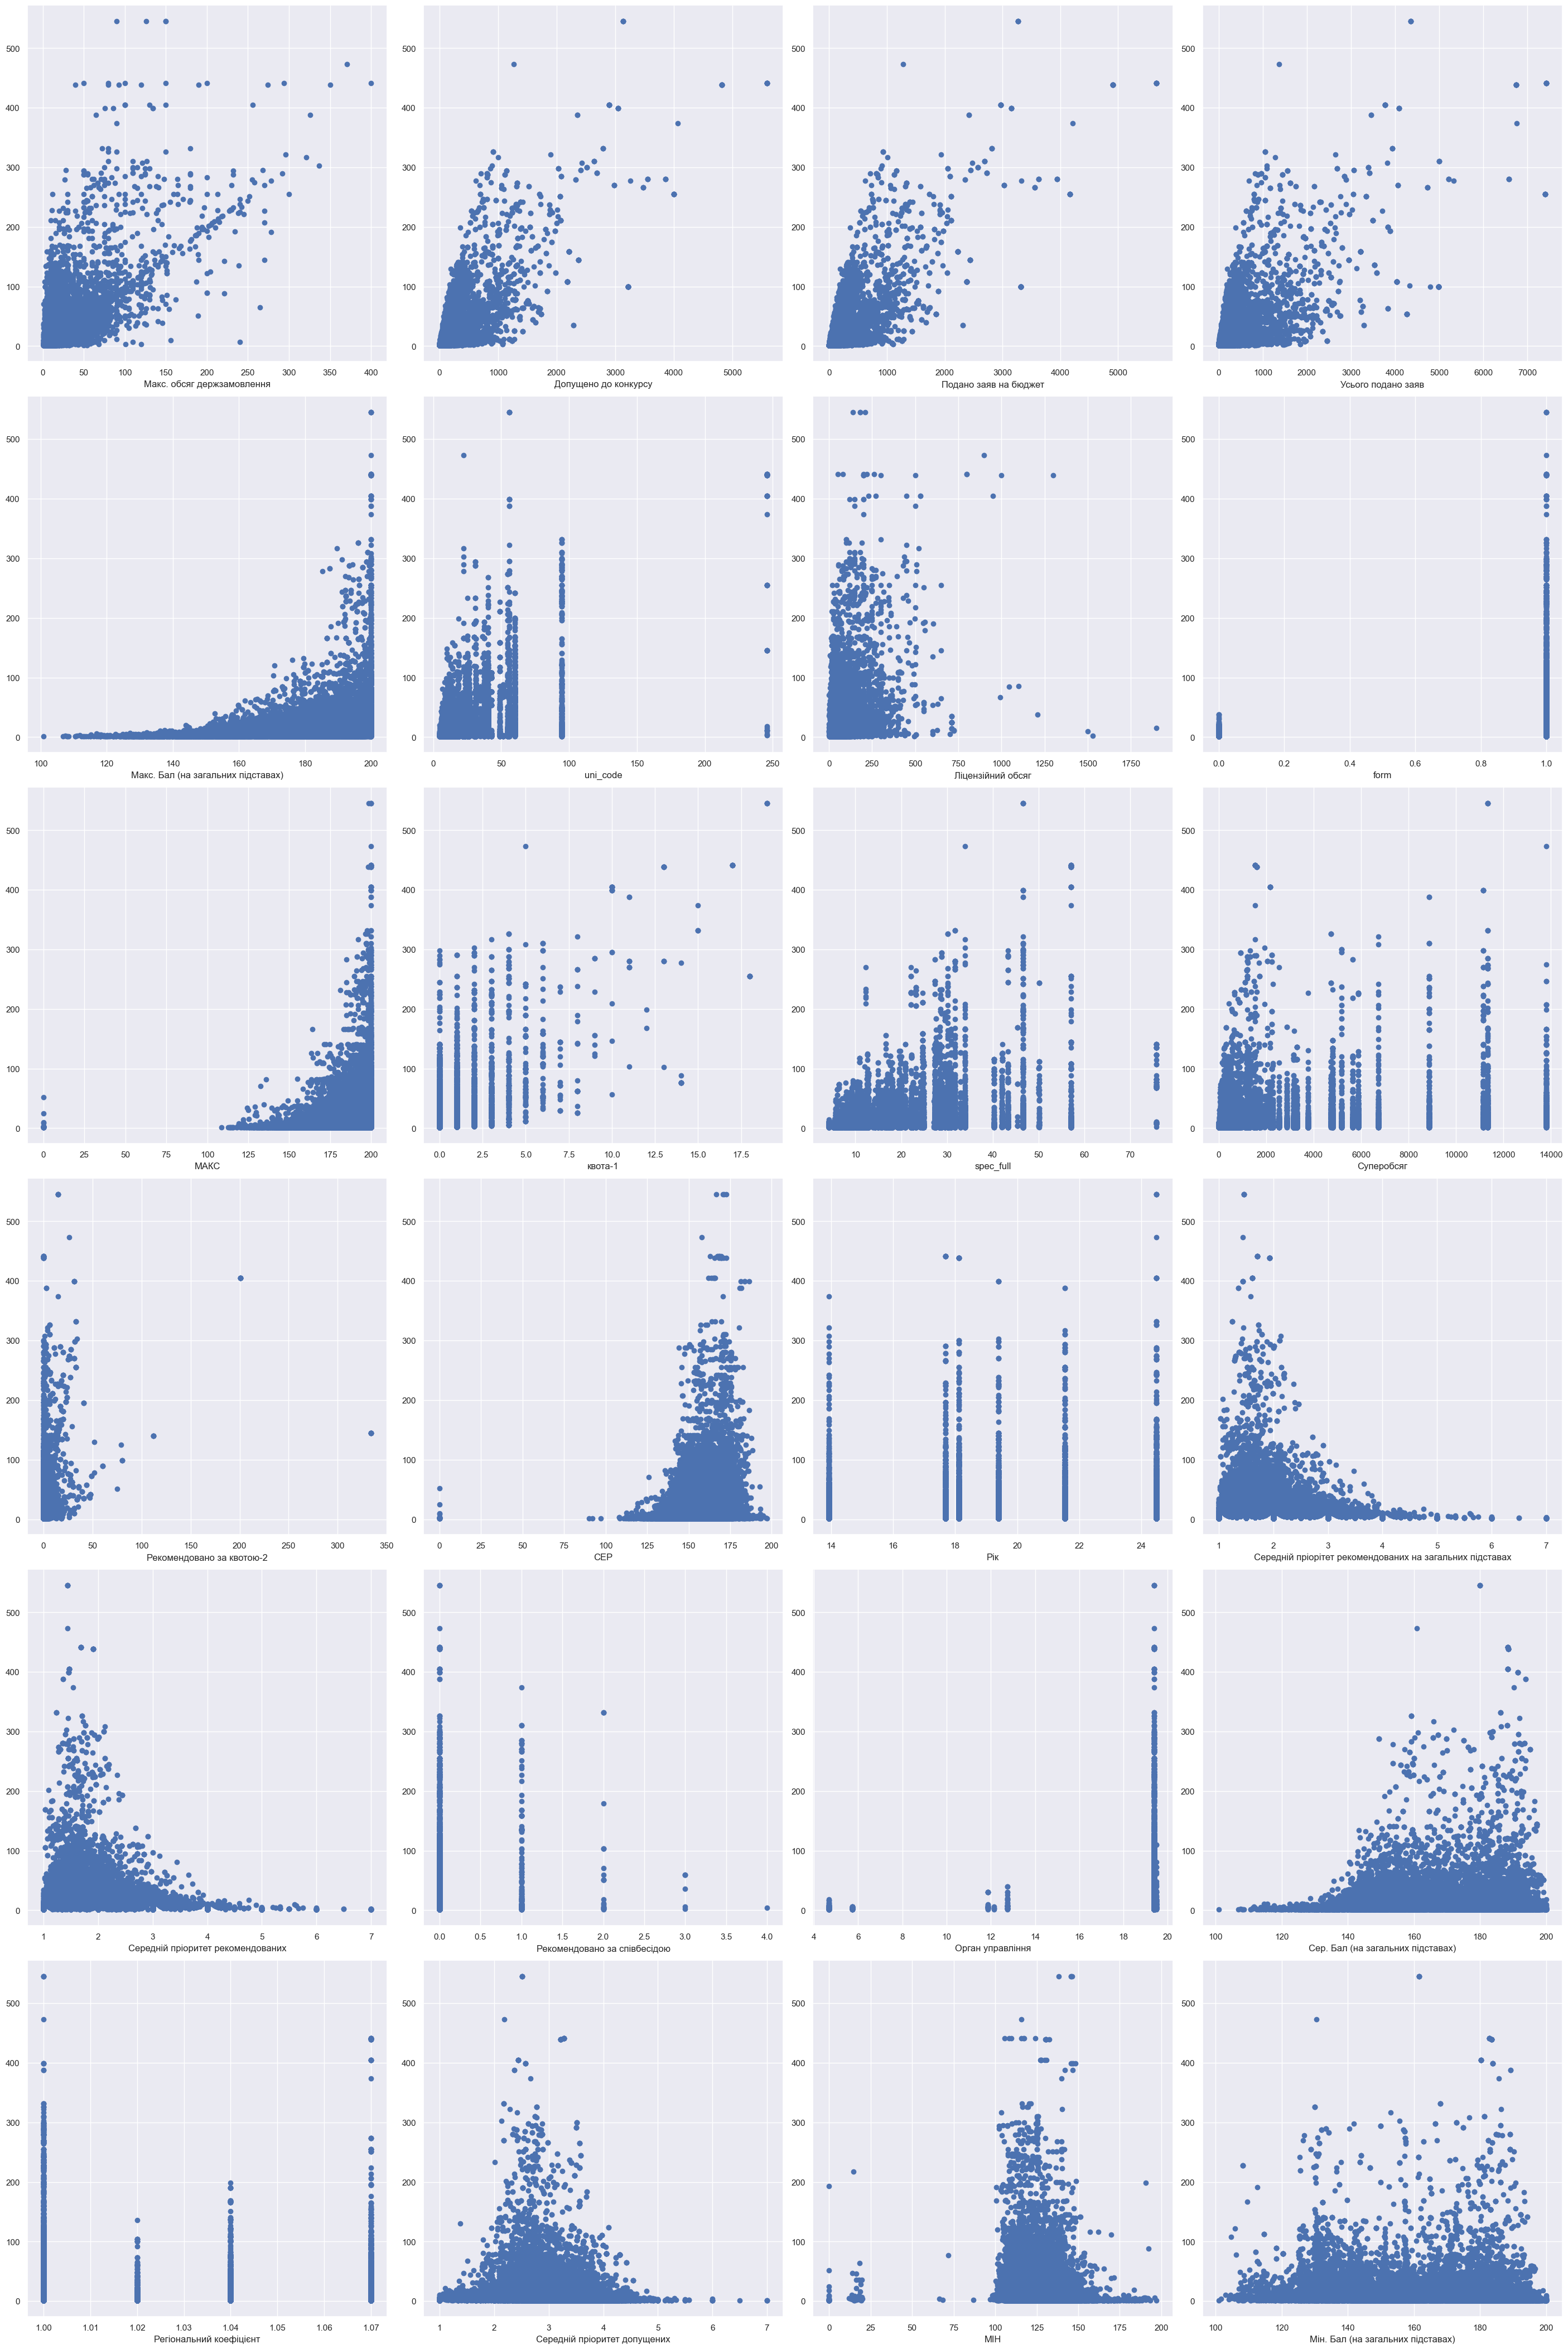

In [12]:
target = clear_df['УСЬОГО']
num_plots = len(clear_df.columns)
total_cols = 4
total_rows = num_plots // total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(7 * total_cols, 7 * total_rows),
                        constrained_layout=True)

for i, var in enumerate(corr_spearman.index):
    row = i // total_cols
    pos = i % total_cols
    axs[row][pos].scatter(clear_df[var], target, label=var)
    axs[row][pos].set_xlabel(var)

# Коефiцiєнти еластичностi
Для визначення мiри впливу регресора на регресанд
без урахування одиниць їх вимiру використовують коефiцiєнт еластичностi.
Коефiцiєнт еластичностi показує, на скiльки вiдсоткiв змiниться регресанд, якщо
при iнших рiвних умовах $k$-й регресор збiльшити на один вiдсоток

Спочатку навчимо багатофакторну лiнiйну регресiйну модель
$$y=b_1 x_1+b_2 x_2+\ldots+b_n x_n+\varepsilon=\sum_{i=1}^n b_i x_i+\varepsilon$$
та оцінимо якість моделі за допомогою MSE (середньоквадратичної помилки):
$$ MSE  = \frac{1}{n}\sum_{i=1}^n \left(y_i - y'_i\right)^2,$$
де $y_i$ - значення цільової змінної,  $y'_i$ - передбачені моделлю значення цільової змінної.

а також коефіцієнта детермінації $R^2$.

In [13]:
X = clear_df.drop(columns='УСЬОГО')
y = clear_df['УСЬОГО']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

pd.DataFrame(linreg.coef_, X.columns, columns=["coef"]).sort_values(by="coef", ascending=False)

MSE: 275.79128785392237
R2 score: 0.8222631534996667


coef
Середній пріорітет рекомендованих на загальних ...   1.262591
Рекомендовано за співбесідою                         1.081581
квота-1                                              1.073229
form                                                 0.892540
Макс. обсяг держзамовлення                           0.527435
Макс. Бал (на загальних підставах)                   0.476079
Допущено до конкурсу                                 0.259315
СЕР                                                  0.200275
uni_code                                             0.175007
Рік                                                  0.172404
spec_full                                            0.114957
Орган управління                                     0.096266
Суперобсяг                                           0.000395
МІН                                                 -0.016380
Усього подано заяв                                  -0.031679
Середній пріоритет рекомендованих                   -0.040628
Рекомендовано за квотою-2                           -0.047378
Ліцензійний обсяг                                   -0.049350
Подано заяв на бюджет                               -0.144788
Сер. Бал (на загальних підставах)                   -0.187554
МАКС                                                -0.189337
Мін. Бал (на загальних підставах)                   -0.328625
Середній пріоритет допущених                        -3.004308
Регіональний коефіцієнт                            -14.944766

З таблиці бачимо, що найбільший вплив на результат має показник "на загальних підставах" (оскільки має максимальне за модулем значення), наступний за ним --- кількість поданих заяв на бюджет, потім --- кількість допущених до конкурсу.

In [14]:
B = linreg.coef_
N = X.shape[1]


def getE(i):
    return B[i] * X.iloc[:, i].mean() / y.mean()


E = np.array([getE(i) for i in range(N)])

elastic_coef = pd.DataFrame(data=[E], columns=list(X.columns)).T.sort_values(by=[0], ascending=False)
elastic_coef

0
Макс. Бал (на загальних підставах)                  4.433053
Допущено до конкурсу                                2.152362
СЕР                                                 1.609303
Макс. обсяг держзамовлення                          0.453709
uni_code                                            0.176948
Рік                                                 0.172405
Середній пріорітет рекомендованих на загальних ...  0.128261
spec_full                                           0.115771
Орган управління                                    0.096325
Суперобсяг                                          0.046732
form                                                0.038425
квота-1                                             0.033652
Рекомендовано за співбесідою                        0.000843
Рекомендовано за квотою-2                          -0.003014
Середній пріоритет рекомендованих                  -0.004048
МІН                                                -0.105161
Ліцензійний обсяг                                  -0.138845
Усього подано заяв                                 -0.408145
Середній пріоритет допущених                       -0.456461
Регіональний коефіцієнт                            -0.793661
Подано заяв на бюджет                              -1.228256
Сер. Бал (на загальних підставах)                  -1.631084
МАКС                                               -1.819768
Мін. Бал (на загальних підставах)                  -2.715525

<AxesSubplot:>

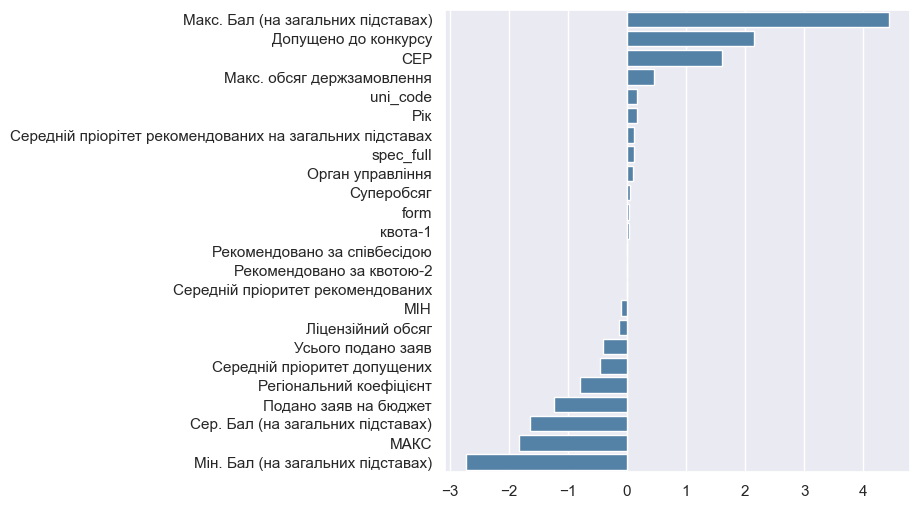

In [15]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(orient='h', data=elastic_coef.T, color='steelblue')

# Часткові коефiцiєнти детермiнацiї
Розрахуємо ще одну ознаку впливовостi регресора у моделi --- часткові коефiцiєнти детермiнацiї. Вони показують, на яку величину зменшиться коефiцiєнт детермiнацiї, якщо якусь фічу виключити з моделi. Чим бiльший відповідний $\Delta R_k^2$, тим більш впливовим є у моделі $k$-й регресор. Частковий коефiцiєнт детермiнацiї розраховується за формулою:
$$\Delta R_k^2=\Delta R_{x_k}^2=\frac{1-R^2}{T-N}\left(\frac{\widehat{\beta}_k}{\widehat{\sigma}_{\widehat{\beta}_k}}\right)^2$$

In [16]:
def s2(y1, yh, n):
    return ((y1 - yh) ** 2).sum() / (T - n)


def s2Bk(x, y1, yh, n):
    return pd.DataFrame(np.linalg.inv(np.dot(x.T, x))) * (s2(y1, yh, n))


def dR2k(r2, t, n, b, s2bk, k):
    return (1 - r2) * ((b[k] / np.sqrt(s2bk[k][k])) ** 2) / (t - n)


yA = linreg.predict(X)
print('R2:', r2_score(y, yA))

T = clear_df.shape[0]
N = clear_df.shape[1] - 1

coefs = []

for i in range(N):
    part_coef = dR2k(r2_score(y, yA), T, N, B, s2Bk(X, y, yA, N), i)
    coefs.append(part_coef)

part_coef = pd.DataFrame(coefs, X.columns, columns=["coef"]).sort_values(by="coef", ascending=False)
part_coef

R2: 0.8112247237934178


coef
Макс. обсяг держзамовлення                          4.898698e-02
Усього подано заяв                                  8.330619e-03
uni_code                                            5.188016e-03
Ліцензійний обсяг                                   5.057401e-03
Макс. Бал (на загальних підставах)                  4.791235e-03
Допущено до конкурсу                                1.956863e-03
Середній пріоритет допущених                        1.581942e-03
МАКС                                                1.569290e-03
Мін. Бал (на загальних підставах)                   1.361797e-03
spec_full                                           1.076050e-03
Суперобсяг                                          8.479845e-04
СЕР                                                 7.231165e-04
Подано заяв на бюджет                               6.121923e-04
квота-1                                             5.227105e-04
Регіональний коефіцієнт                             3.731534e-04
Рік                                                 1.865689e-04
Сер. Бал (на загальних підставах)                   1.548083e-04
Рекомендовано за квотою-2                           7.794680e-05
Середній пріорітет рекомендованих на загальних ...  7.595020e-05
form                                                4.765436e-05
МІН                                                 1.571509e-05
Рекомендовано за співбесідою                        1.515148e-05
Орган управління                                    9.994696e-06
Середній пріоритет рекомендованих                   6.527172e-08

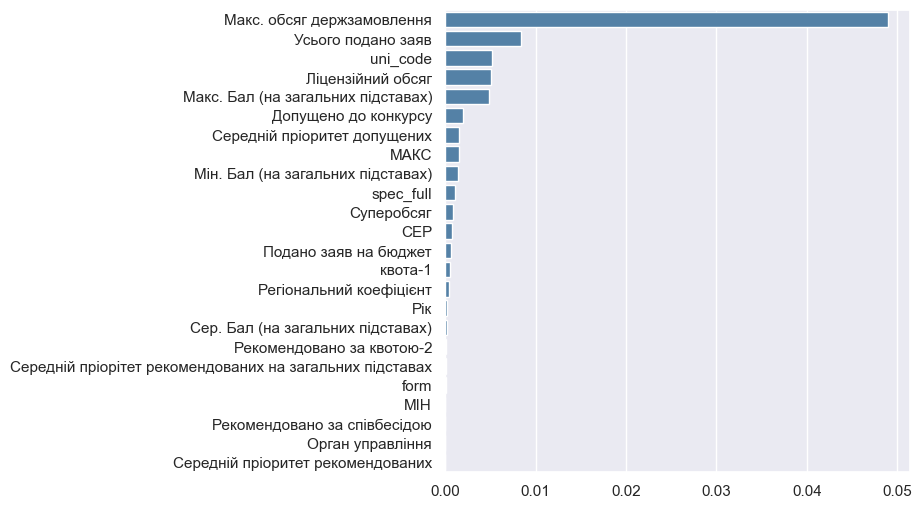

In [17]:
sns.barplot(orient='h', data=part_coef.T, color='steelblue')
plt.show()